In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('usdt-usd.csv')
df.head(5) 

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-11-09 00:00:00+00:00,1.01087,1.01327,0.996515,1.00818,358188000,0.0,0.0
1,2017-11-10 00:00:00+00:00,1.00650,1.02423,0.995486,1.00601,756446016,0.0,0.0
2,2017-11-11 00:00:00+00:00,1.00598,1.02621,0.995799,1.00899,746227968,0.0,0.0
3,2017-11-12 00:00:00+00:00,1.00602,1.10591,0.967601,1.01247,1466060032,0.0,0.0
4,2017-11-13 00:00:00+00:00,1.00448,1.02929,0.975103,1.00935,767884032,0.0,0.0


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [5]:
df.drop([ 'Open', 'High', 'Low',  'Dividends', 'Stock Splits', 'Volume'], inplace = True, axis = 1)

In [6]:
df['time'] = pd.to_datetime(df['Date'])
df['formatted_time'] = df['time'].dt.strftime('%d-%m-%Y')
df['formatted_time']

0       09-11-2017
1       10-11-2017
2       11-11-2017
3       12-11-2017
4       13-11-2017
           ...    
2394    30-05-2024
2395    31-05-2024
2396    01-06-2024
2397    02-06-2024
2398    03-06-2024
Name: formatted_time, Length: 2399, dtype: object

In [7]:
df.drop([ 'Date', 'time'], inplace = True, axis = 1)

In [16]:
import pandas_ta as ta
 
df['SMA'] = ta.sma(df['Close'], length=5) 
df['EMA'] = ta.ema(df['Close'], length=5) 
df['RSI'] = ta.rsi(df['Close'], length=14) 

In [17]:
df

,Close,formatted_time,SMA,EMA,RSI
0,1.008180,09-11-2017,NaN,NaN,NaN
1,1.006010,10-11-2017,NaN,NaN,NaN
2,1.008990,11-11-2017,NaN,NaN,NaN
3,1.012470,12-11-2017,NaN,NaN,NaN
4,1.009350,13-11-2017,1.009000,1.009000,NaN
...,...,...,...,...,...
2394,0.999658,30-05-2024,0.999212,0.999314,49.520516
2395,0.998995,31-05-2024,0.999106,0.999208,42.810368
2396,0.999292,01-06-2024,0.999122,0.999236,46.319632
2397,0.999403,02-06-2024,0.999222,0.999291,47.613214


In [18]:
df.fillna(0, inplace = True)

In [19]:
new_df = df.copy()

In [21]:
new_df.tail(20)

,Close,formatted_time,SMA,EMA,RSI
2379,1.000547,15-05-2024,0.999864,0.999995,56.905243
2380,1.000098,16-05-2024,0.999932,1.000029,51.611602
2381,1.000400,17-05-2024,1.000099,1.000153,54.665505
2382,1.000206,18-05-2024,1.000169,1.000170,52.378818
2383,0.999912,19-05-2024,1.000233,1.000084,49.031055
2384,1.000098,20-05-2024,1.000143,1.000089,51.157777
2385,0.999879,21-05-2024,1.000099,1.000019,48.586831
2386,0.999456,22-05-2024,0.999910,0.999831,43.988112
2387,0.999579,23-05-2024,0.999785,0.999747,45.600728
2388,0.999810,24-05-2024,0.999764,0.999768,48.593121


In [22]:
X = new_df.drop(['Close', 'formatted_time'], axis = 1).values
Y = new_df['Close'].values

In [23]:
X

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       ...,
       [ 0.99912181,  0.99923575, 46.31963211],
       [ 0.999222  ,  0.9992915 , 47.61321412],
       [ 0.9993829 ,  0.99938316, 49.54223662]])

In [24]:
Y

array([1.00818002, 1.00601006, 1.00899005, ..., 0.99929202, 0.999403  ,
       0.9995665 ])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from keras.optimizers import Adam


In [27]:
rf = RandomForestRegressor()
 
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300]})

In [28]:
best_rf = grid_search_rf.best_estimator_
best_rf

RandomForestRegressor(n_estimators=300)

In [29]:
y_pred_rf = best_rf.predict(X_test)
y_pred_rf

array([1.00002969, 1.00029692, 1.0087777 , 0.99936268, 1.00021462,
       0.99304206, 1.00075706, 1.00006255, 1.00257181, 1.00089973,
       0.99955984, 0.99994746, 1.00015144, 1.00064947, 0.99969567,
       1.00004595, 0.99774578, 1.0000965 , 1.00007714, 1.00048133,
       1.00318127, 1.00034458, 0.99987211, 1.00046503, 1.00035392,
       1.00410022, 1.00050278, 0.99887017, 1.00043564, 1.00043405,
       1.00007338, 1.00110895, 1.00047521, 1.0004165 , 1.00005393,
       1.00031046, 1.00662822, 1.00102749, 1.00420766, 1.00057992,
       1.00867693, 1.00043382, 1.00334628, 1.00651283, 1.00555926,
       1.00002448, 0.99991211, 0.99964011, 1.00078371, 1.00037329,
       1.00111693, 0.99929687, 1.01884593, 1.00032878, 1.00011474,
       1.00072169, 1.00066651, 0.99992976, 1.00025898, 1.00036898,
       1.00011141, 1.00195609, 1.00003456, 1.00350591, 1.00010136,
       1.00213385, 0.99954163, 1.02461253, 0.99851723, 1.00018466,
       1.00017189, 1.00253362, 1.00019195, 1.0004362 , 1.00388

In [30]:
rf_metrics = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}
print(rf_metrics)


{'RMSE': 0.001800782635511388, 'MSE': 3.2428181003593407e-06, 'MAE': 0.0007334840500520364, 'R2': 0.8843635627271114}


In [31]:
len(df)

2399

In [32]:
data = df [len(df) - 15:]

In [34]:
for i in range(10):
    sma = ta.sma(data['Close'], length=5).iloc[-1]
    ema = ta.ema(data['Close'], length=5).iloc[-1]
    rsi = ta.rsi(data['Close'], length=14).iloc[-1]
    # sma_5, ema_5, rsi_14 = scaler.fit_transform(np.array([sma, ema, rsi]).reshape(-1, 1))
    # new_close = best_rf.predict([[0.163528, 0.0, 0.0, 0.0, 1.0, 0.0, sma_5[0], ema_5[0], rsi_14[0]]])
    new_close = best_rf.predict([[sma, ema, rsi]])
    print(new_close)
    new_row = pd.DataFrame({"Close": new_close, "formatted_time" : "0", "SMA" : sma, "EMA" : ema, "RSI" : rsi})
    data = pd.concat([data, new_row], ignore_index= True)
    

[0.99882265]
[0.99888768]
[0.9988445]
[0.99870411]
[0.9986585]
[0.99872825]
[0.99868193]
[0.99866508]
[0.99861337]
[0.99858481]


In [35]:
data

,Close,formatted_time,SMA,EMA,RSI
0,1.000098,20-05-2024,1.000143,1.000089,51.157777
1,0.999879,21-05-2024,1.000099,1.000019,48.586831
2,0.999456,22-05-2024,0.999910,0.999831,43.988112
3,0.999579,23-05-2024,0.999785,0.999747,45.600728
4,0.999810,24-05-2024,0.999764,0.999768,48.593121
5,0.999885,25-05-2024,0.999722,0.999807,49.563868
6,0.999528,26-05-2024,0.999652,0.999714,45.191402
7,0.999212,27-05-2024,0.999603,0.999547,41.686526
8,0.998902,28-05-2024,0.999467,0.999332,38.529193
9,0.998762,29-05-2024,0.999258,0.999142,37.160253


In [ ]:

# Evaluate the model
rf_metrics = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}
print(rf_metrics)


{'RMSE': 39.27151662421437, 'MSE': 1542.2520179659455, 'MAE': 20.68864892191357, 'R2': 0.9988150096961236}


In [ ]:
# Define the model
gb = GradientBoostingRegressor()

# Define the hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Perform GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3)
grid_search_gb.fit(X_train, y_train)

# Best hyperparameters
best_gb = grid_search_gb.best_estimator_

# Make predictions
y_pred_gb = best_gb.predict(X_test)

# Evaluate the model
gb_metrics = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_gb)),
    'MSE': mean_squared_error(y_test, y_pred_gb),
    'MAE': mean_absolute_error(y_test, y_pred_gb),
    'R2': r2_score(y_test, y_pred_gb)
}
print(gb_metrics)


{'RMSE': 41.43719249762574, 'MSE': 1717.040922085291, 'MAE': 24.337949571488707, 'R2': 0.9986807105321778}


In [36]:
data =df[len(df) - 15:]
for i in range(10):
    sma = ta.sma(data['Close'], length=5).iloc[-1]
    ema = ta.ema(data['Close'], length=5).iloc[-1]
    rsi = ta.rsi(data['Close'], length=14).iloc[-1]
    # sma_5, ema_5, rsi_14 = scaler.fit_transform(np.array([sma, ema, rsi]).reshape(-1, 1))
    # new_close = best_rf.predict([[0.163528, 0.0, 0.0, 0.0, 1.0, 0.0, sma_5[0], ema_5[0], rsi_14[0]]])
    new_close = best_rf.predict([[sma, ema, rsi]])
    print(new_close)
    new_row = pd.DataFrame({"Close": new_close, "formatted_time" : "0", "SMA" : sma, "EMA" : ema, "RSI" : rsi})
    data = pd.concat([data, new_row], ignore_index= True)
    

[0.99882265]
[0.99888768]
[0.9988445]
[0.99870411]
[0.9986585]
[0.99872825]
[0.99868193]
[0.99866508]
[0.99861337]
[0.99858481]


In [38]:
import pickle 
with open('usdt.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

In [ ]:
X_train.shape

(1919, 3)

In [ ]:
X_train.shape[0], X_train.shape[1]

(1919, 3)

In [ ]:
X_train_lstm = X_train.reshape((X_train.shape[0],3, 1))
X_test_lstm = X_test.reshape((X_test.shape[0], 3, 1))
# Print shapes for verification
print("X_train_lstm shape:", X_train_lstm.shape)
print("X_test_lstm shape:", X_test_lstm.shape)

X_train_lstm shape: (1919, 3, 1)
X_test_lstm shape: (480, 3, 1)


In [ ]:
# # Define the LSTM model
# lstm_model = Sequential()
# lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
# lstm_model.add(LSTM(50))
# lstm_model.add(Dense(1))
# # Compile the model
# lstm_model.compile(optimizer=Adam(), loss='mean_squared_error')
# # Train the model
# history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3220245.0000 - val_loss: 3308984.7500
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3312998.7500 - val_loss: 3294798.0000
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3116915.5000 - val_loss: 3286561.0000
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3367598.0000 - val_loss: 3279007.7500
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3273949.5000 - val_loss: 3271787.2500
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3017533.2500 - val_loss: 3264702.0000
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3179971.2500 - val_loss: 3257810.7500
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3059305.7500 - val_loss: 3250938.7500
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3094807.0000 - val_loss: 3244162.2500
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3258242.2500 - val_loss: 3237368.7500
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# # Make predictions
# y_pred_lstm = lstm_model.predict(X_test_lstm)

# # Evaluate the model
# lstm_metrics = {
#     'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lstm)),
#     'MSE': mean_squared_error(y_test, y_pred_lstm),
#     'MAE': mean_absolute_error(y_test, y_pred_lstm),
#     'R2': r2_score(y_test, y_pred_lstm)
# }

# # Print metrics
# print("LSTM Metrics:", lstm_metrics)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
LSTM Metrics: {'RMSE': 1630.0234276966655, 'MSE': 2656976.374839986, 'MAE': 1165.4051440874734, 'R2': -1.0414894616033417}


In [ ]:
# # Define the GRU model
# gru_model = Sequential()
# gru_model.add(GRU(50, return_sequences=True, input_shape=(3, 1)))
# gru_model.add(GRU(50))
# gru_model.add(Dense(1))

# gru_model.compile(optimizer=Adam(), loss='mean_squared_error')

# # Train the model
# gru_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# # Make predictions
# y_pred_gru = gru_model.predict(X_test_lstm)

# # Evaluate the model
# gru_metrics = {
#     'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_gru)),
#     'MSE': mean_squared_error(y_test, y_pred_gru),
#     'MAE': mean_absolute_error(y_test, y_pred_gru),
#     'R2': r2_score(y_test, y_pred_gru)
# }
# print(gru_metrics)


Epoch 1/50


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3167619.7500 - val_loss: 3303035.2500
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3152898.0000 - val_loss: 3293619.2500
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3205742.0000 - val_loss: 3285983.0000
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3316338.7500 - val_loss: 3278759.0000
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3137403.0000 - val_loss: 3271796.0000
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3136603.7500 - val_loss: 3264869.0000
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3097917.7500 - val_loss: 3258013.7500
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3081980.5000 - val_loss: 3251265.2500
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3118241.5000 - val_loss: 3244608.7500
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3267911.0000 - val_loss: 3237886.2500
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

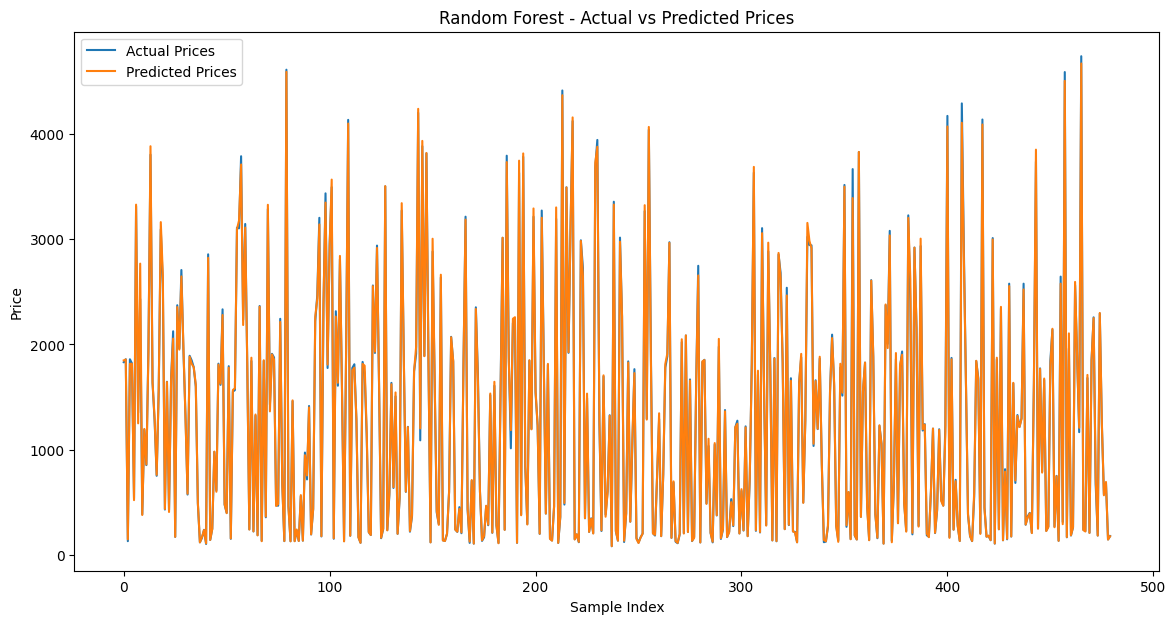

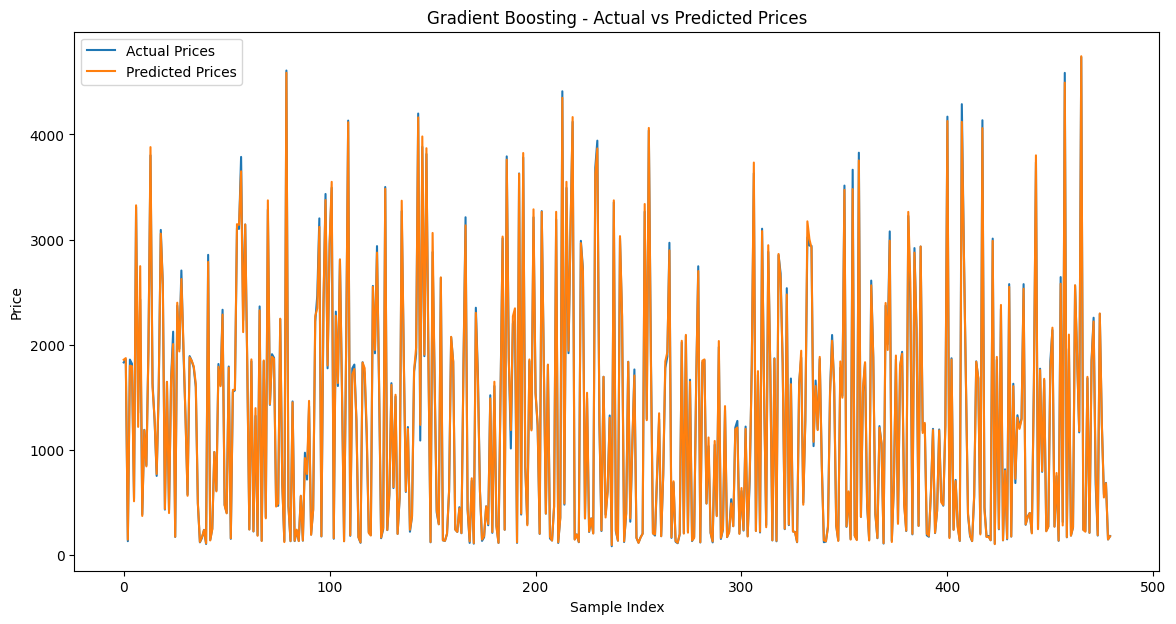

C:\Users\HP\AppData\Local\Temp\ipykernel_18804\2888895966.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
C:\Users\HP\AppData\Local\Temp\ipykernel_18804\2888895966.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
C:\Users\HP\AppData\Local\Temp\ipykernel_18804\2888895966.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
C:\Users\HP\AppData\Local\Temp\ipykernel_18804\2888895966.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')


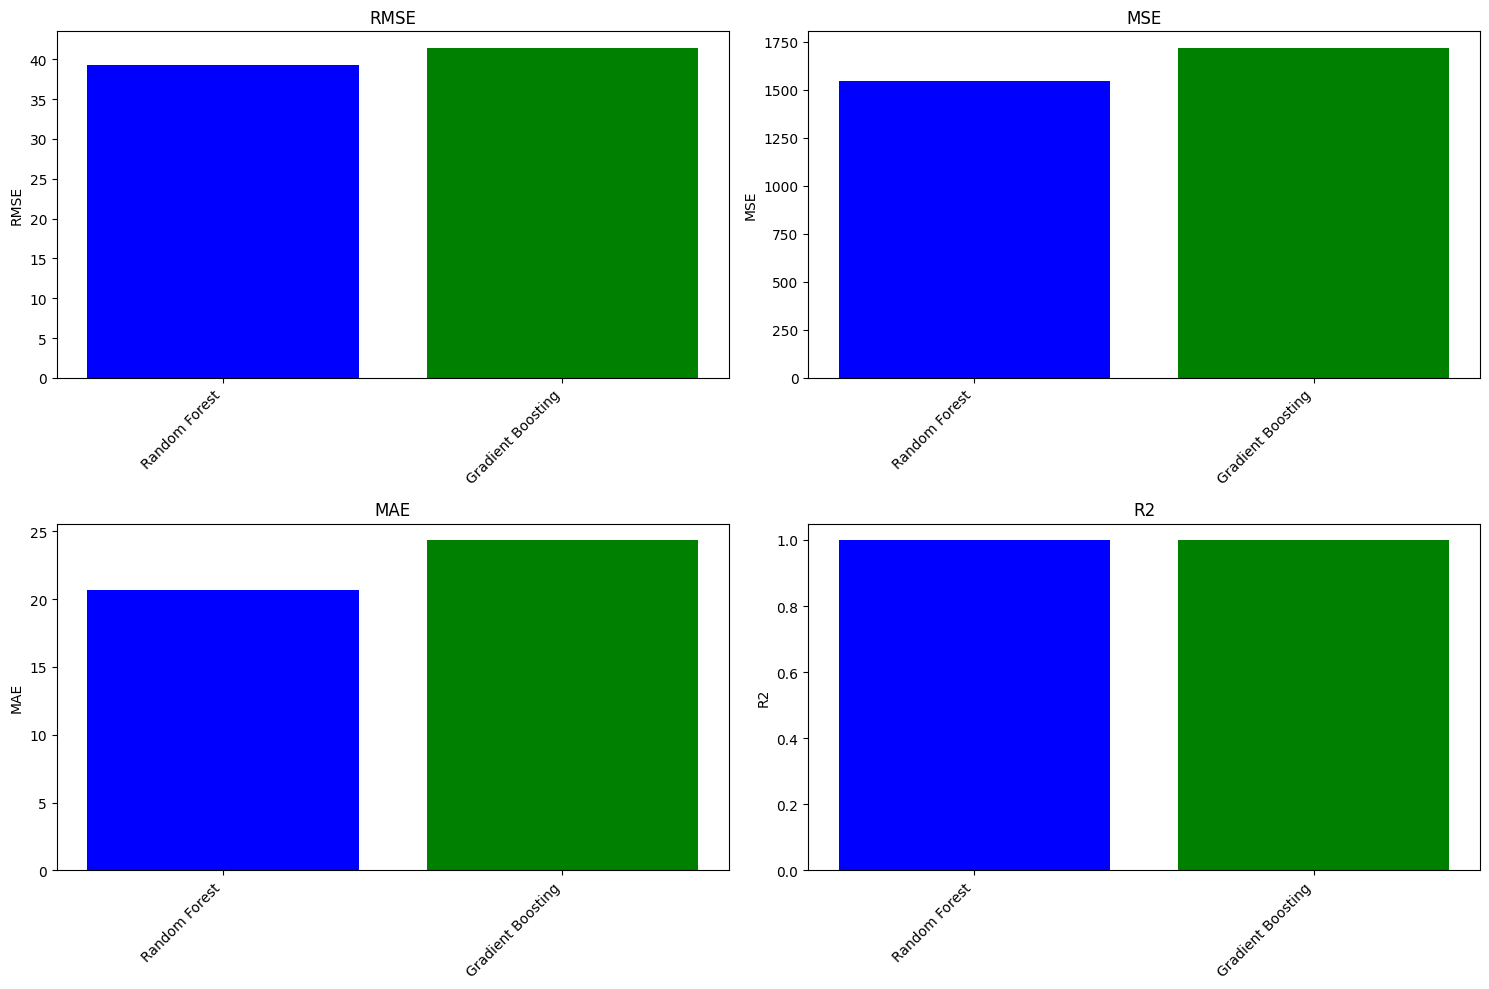

In [ ]:
import matplotlib.pyplot as plt

# Create a dictionary to store metrics for each model
metrics_dict = {
    'Random Forest': rf_metrics,
    'Gradient Boosting': gb_metrics, 
}

# Function to plot actual vs predicted prices
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(14, 7))
    plt.plot(y_test, label='Actual Prices')
    plt.plot(y_pred, label='Predicted Prices')
    plt.title(f'{model_name} - Actual vs Predicted Prices')
    plt.xlabel('Sample Index')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Plotting for each model
plot_predictions(y_test, y_pred_rf, 'Random Forest')
plot_predictions(y_test, y_pred_gb, 'Gradient Boosting') 

# Function to plot the performance metrics
def plot_metrics(metrics_dict):
    metrics_names = ['RMSE', 'MSE', 'MAE', 'R2']
    models = list(metrics_dict.keys())

    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    for i, metric in enumerate(metrics_names):
        ax = axs[i//2, i%2]
        values = [metrics_dict[model][metric] for model in models]
        ax.bar(models, values, color=['blue', 'green', 'orange', 'red'])
        ax.set_title(metric)
        ax.set_ylabel(metric)
        ax.set_xticklabels(models, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

# Plot performance metrics
plot_metrics(metrics_dict)
